In [1]:
#Las librerías utilizadas en este documento son:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

In [2]:
#leemos el df creado para el barrio de caballito
df = pd.read_csv('./data/data_limpio_gdf_caballito.csv')

## Regresión lineal múltiple

Agregamos a la correlacion las variables latitud y longitud

In [3]:
# Asignamos las variables predictoras

X = df[['lat', 'lon', 'sup_m2_total']]

y = df['precio_usd']

# Normalizamos los datos

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciamos el modelo y lo entrenamos

lr= linear_model.LinearRegression()
lr.fit(X_train, y_train)

# Vemos los coeficientes

print('Coeficientes: ', lr.coef_)
print('Intercepto: ', lr.intercept_)
print('R2_train: ', r2_score(y_train, lr.predict(X_train)))
print('R2_test: ', r2_score(y_test, lr.predict(X_test)))
print ('MSE:', metrics.mean_squared_error(y, lr.predict(X)))
rmse_multi = np.sqrt(metrics.mean_squared_error(y, lr.predict(X)))
print ('rMSE:', rmse_multi)


Coeficientes:  [ -1405.46722565   7629.33029611 113547.52518721]
Intercepto:  190066.77505739304
R2_train:  0.4021235576441734
R2_test:  0.42294055350555415
MSE: 15424825612.386456
rMSE: 124196.721423661


In [4]:
rmse_simple = 113040.74611014882

print('Diferencia porcentual entre el rmse de la regresión simple y la regresión múltiple: ', (rmse_multi - rmse_simple)/rmse_simple*100)
print('Diferencia absoluta entre el rmse de la regresión simple y la regresión múltiple: ', rmse_multi - rmse_simple)

Diferencia porcentual entre el rmse de la regresión simple y la regresión múltiple:  9.868985916495646
Diferencia absoluta entre el rmse de la regresión simple y la regresión múltiple:  11155.975313512186


Recordemos que para la regresión lineal simple, la raíz del error cuadrático medio (RMSE) fue de `r_EMC: 113040.74611014882`, muy similar al RMSE de la regresión lineal múltiple, que es de `r_EMC: 124196.721423661`, una diferencia de `r_EMC: 11155.97531351218` que es del 10% del RMSE de la regresión lineal simple.

Esto nos indica que la regresión lineal múltiple no mejora el modelo, por lo que no es necesario agregar más variables.

Podemos también confirmar que la regresión lineal múltiple no mejora el modelo viendo la no mejora del score de validación cruzada y las correlaciones de las variables.

In [5]:
# Cross validation
scores = cross_val_score(lr, X, y, cv=5)

print('Cross-validated scores:', scores)
print('Cross-validated scores mean:', scores.mean())


Cross-validated scores: [0.58453773 0.17963803 0.65526427 0.69346876 0.6851825 ]
Cross-validated scores mean: 0.559618258188525


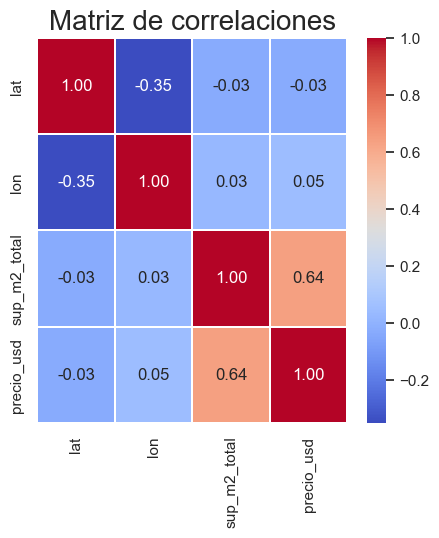

In [6]:
# Observamos las correlaciones entre las variables

corr = df[['lat', 'lon', 'sup_m2_total', 'precio_usd']].corr()

# Graficamos la matriz de correlaciones

plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)
plt.title('Matriz de correlaciones', fontsize=20)
plt.show()

In [7]:
# Modelamos con statsmodels

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             precio_usd   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     308.5
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          3.83e-153
Time:                        08:37:33   Log-Likelihood:                -18210.
No. Observations:                1380   AIC:                         3.643e+04
Df Residuals:                    1376   BIC:                         3.645e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.901e+05   3508.946     54.166      0.0

Comparando la regresión multiple sencilla con la regresión OLS podemos observar como OLS nos permite validar la significancia de los datos obtenidos. Vemos con los p values para las variables latitud y longitud son mayores al nivel de significancia por lo cual estas variables no están explicando o no tiene valor de predicción sobre el valor de nuestra variable objetivo precio en dólares.

Al incluir latitud y longitud disminuye el performance del R2 a 0,38 en la regresión multiple.